# Analysis of Moment Estimation Techniques

In this notebook we compare the performance of different moment esimtation techniques with output from simuPOP. The data used in this notebook can be generated using the snakefile in the folder `paperImages/fixedImages`.

We first specificy the column names and read in the data. All data is stored in `odePerformance_all.csv`.

In [1]:
# Specify column names and load data
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

column_names = ['interp_type', 'initial_value', 'demography', 'renomalize_ind', 'parsimonious_ind', 'min_step', 'd_size', 's', 'r',
                'order', 'inst_time', 'param_time', 'integrate_time', 'dmdt_evaluations',
               'bot_abs_error', 'exp_abs_error', 'tot_abs_error', 
                'bot_abs_weighted_error', 'exp_abs_weighted_error', 'tot_abs_weighted_error',
                'bot_mse', 'exp_mse', 'tot_mse', 
                'hap_mse', 'hap_abs_error', 'order10_mse', 'order10_abs_error']
all_data = pd.read_csv('odePerformance_all.csv', names=column_names)
performance = all_data[all_data['order'] == 31]
order_analysis = all_data[all_data['order'] != 31]
performance = performance.rename(columns = {'jackknife' : 'jackknife-unconstrained', 'jackknife-constrained' : 'jackknife'})
performance.head()





,interp_type,initial_value,demography,renomalize_ind,parsimonious_ind,min_step,d_size,s,r,order,inst_time,param_time,integrate_time,dmdt_evaluations,bot_abs_error,exp_abs_error,tot_abs_error,bot_abs_weighted_error,exp_abs_weighted_error,tot_abs_weighted_error,bot_mse,exp_mse,tot_mse,hap_mse,hap_abs_error,order10_mse,order10_abs_error
3456,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,False,True,0.0001,0,0.00025,0.01,31,34.981217,1.486315,412.385502,60228,9.451778e-19,0.000017,0.000019,NaN,3356.892389,105.598783,4.219092e-34,3.492986e-08,4.722283e-08,0.000022,0.003950,0.000001,0.000224
3457,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,False,False,0.0001,0,0.00025,0.01,31,35.108702,1.507788,43.733634,60234,9.451778e-19,0.000111,0.000234,NaN,3040.407633,129.517659,4.219092e-34,2.843749e-06,1.761567e-05,0.260491,0.366161,0.000958,0.005129
3458,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,True,True,0.0001,0,0.00025,0.01,31,36.732429,1.677766,443.066351,60228,6.582540e-19,0.000017,0.000019,NaN,3356.414887,105.486704,1.574846e-34,3.496643e-08,4.707875e-08,0.000022,0.003920,0.000001,0.000223
3459,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,True,False,0.0001,0,0.00025,0.01,31,34.807239,1.511533,46.611064,60234,6.582540e-19,0.000069,0.000134,NaN,1821.794039,51.991223,1.574846e-34,1.095058e-06,5.700033e-06,0.002883,0.042762,0.000046,0.001544
3460,jackknife,"[0.01, 0.0, 0.49, 0.5]",bottle,False,True,0.0001,0,0.00025,0.01,31,33.298362,1.463295,399.581707,60228,9.451778e-19,0.000017,0.000019,NaN,3351.685493,104.851022,4.219092e-34,3.494559e-08,4.720045e-08,0.000021,0.003840,0.000001,0.000222


In some cases, the approximations performed so poorly that the ODE integration needed to be aborted. In these cases we replace the resulting `NA` with 10 times the maximum error.

In [2]:
# Fill missing values with 10 times the worst performance
performance = performance.fillna(performance.max()*10)
performance.head()

,interp_type,initial_value,demography,renomalize_ind,parsimonious_ind,min_step,d_size,s,r,order,inst_time,param_time,integrate_time,dmdt_evaluations,bot_abs_error,exp_abs_error,tot_abs_error,bot_abs_weighted_error,exp_abs_weighted_error,tot_abs_weighted_error,bot_mse,exp_mse,tot_mse,hap_mse,hap_abs_error,order10_mse,order10_abs_error
3456,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,False,True,0.0001,0,0.00025,0.01,31,34.981217,1.486315,412.385502,60228,9.451778e-19,0.000017,0.000019,inf,3356.892389,105.598783,4.219092e-34,3.492986e-08,4.722283e-08,0.000022,0.003950,0.000001,0.000224
3457,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,False,False,0.0001,0,0.00025,0.01,31,35.108702,1.507788,43.733634,60234,9.451778e-19,0.000111,0.000234,inf,3040.407633,129.517659,4.219092e-34,2.843749e-06,1.761567e-05,0.260491,0.366161,0.000958,0.005129
3458,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,True,True,0.0001,0,0.00025,0.01,31,36.732429,1.677766,443.066351,60228,6.582540e-19,0.000017,0.000019,inf,3356.414887,105.486704,1.574846e-34,3.496643e-08,4.707875e-08,0.000022,0.003920,0.000001,0.000223
3459,jackknife-constrained,"[0.01, 0.0, 0.49, 0.5]",bottle,True,False,0.0001,0,0.00025,0.01,31,34.807239,1.511533,46.611064,60234,6.582540e-19,0.000069,0.000134,inf,1821.794039,51.991223,1.574846e-34,1.095058e-06,5.700033e-06,0.002883,0.042762,0.000046,0.001544
3460,jackknife,"[0.01, 0.0, 0.49, 0.5]",bottle,False,True,0.0001,0,0.00025,0.01,31,33.298362,1.463295,399.581707,60228,9.451778e-19,0.000017,0.000019,inf,3351.685493,104.851022,4.219092e-34,3.494559e-08,4.720045e-08,0.000021,0.003840,0.000001,0.000222


For comparison we will only focus on iterations under the full demography (i.e. 6,000 generations at population size 10,000, followed by 3,000 generations at 2,000, followed by 1,000 generations of exponential growth).

In [3]:
# Include only when cases with with the full demography
performance = performance[performance['demography']=='full']

We now count all of the entries to check that we have 48 cases for each combination of interpolation type.

In [4]:
# Make sure there are 48 simulations for each ode setting
to_group = ['interp_type', 'renomalize_ind', 'parsimonious_ind']
performance_counts = performance.groupby(to_group).count()
performance_counts

initial_value  \
interp_type           renomalize_ind parsimonious_ind                  
jackknife             False          False                        48   
                                     True                         48   
                      True           False                        48   
                                     True                         48   
jackknife-constrained False          False                        48   
                                     True                         48   
                      True           False                        48   
                                     True                         48   
lin                   False          False                        48   
                                     True                         48   
                      True           False                        48   
                                     True                         48   
loglin                False          False                        48   
                                     True                         48   
                      True           False                        48   
                                     True                         48   
project               False          False                        48   
                                     True                         48   
                      True           False                        48   
                                     True                         48   

                                                       demography  min_step  \
interp_type           renomalize_ind parsimonious_ind                         
jackknife             False          False                     48        48   
                                     True                      48        48   
                      True           False                     48        48   
                                     True                      48        48   
jackknife-constrained False          False                     48        48   
                                     True                      48        48   
                      True           False                     48        48   
                                     True                      48        48   
lin                   False          False                     48        48   
                                     True                      48        48   
                      True           False                     48        48   
                                     True                      48        48   
loglin                False          False                     48        48   
                                     True                      48        48   
                      True           False                     48        48   
                                     True                      48        48   
project               False          False                     48        48   
                                     True                      48        48   
                      True           False                     48        48   
                                     True                      48        48   

                                                       d_size   s   r  order  \
interp_type           renomalize_ind parsimonious_ind                          
jackknife             False          False                 48  48  48     48   
                                     True                  48  48  48     48   
                      True           False                 48  48  48     48   
                                     True                  48  48  48     48   
jackknife-constrained False          False                 48  48  48     48   
                                     True                  48  48  48     48   
                      True           False                 48  48  48     48   
           

Below we take the mean over all interations for all interpolation options and find that `loglin` with renormalization but no parsimonious projection has the best performance.

In [5]:
# Select metrics and parameters to group by
metrics = ['tot_abs_error', 'tot_mse']


# Compute means for each configuration
performance_means = performance.groupby(to_group)[metrics].mean()

# Get best performer for each metric
min_mean_idx = performance_means.idxmin()

# Print best performers and means
print(min_mean_idx)
performance_means.loc[min_mean_idx]

tot_abs_error    (loglin, True, False)
tot_mse          (loglin, True, False)
dtype: object


tot_abs_error       tot_mse
interp_type renomalize_ind parsimonious_ind                             
loglin      True           False                  0.000014  9.470875e-08
                           False                  0.000014  9.470875e-08

And below we get the best combination of renomalization and parsimonious projection for each interpolation type (according to MSE) along with the corresponding MSE.

In [6]:
# Select best MSE configuration for each interpolation type
performance_means.loc[performance_means.groupby('interp_type').idxmin()['tot_mse']]

,,,tot_abs_error,tot_mse
interp_type,renomalize_ind,parsimonious_ind,,
jackknife,True,True,0.000042,8.623887e-06
jackknife-constrained,True,True,0.000048,1.042980e-05
lin,True,False,0.000046,1.178034e-06
loglin,True,False,0.000014,9.470875e-08
project,True,False,0.000019,1.785778e-06


We then do the same for absolute error. Notice that the only change is in the `lin` interpolation type.

In [7]:
# Select best Absolute error configuration for eahc interpolation type
performance_means.loc[performance_means.groupby('interp_type').idxmin()['tot_abs_error']]




,,,tot_abs_error,tot_mse
interp_type,renomalize_ind,parsimonious_ind,,
jackknife,True,True,0.000042,8.623887e-06
jackknife-constrained,True,True,0.000048,1.042980e-05
lin,False,True,0.000020,1.475975e-06
loglin,True,False,0.000014,9.470875e-08
project,True,False,0.000019,1.785778e-06


We now perform the same analysis by considering the mini-max performance. Namely, we find the combination of interpolation parameters which has the best performance when considering its worst interation. Below we see that `loglin` along with renormalization but not projection performs best again by this metric.

In [8]:
# Compute worst trail for each configuration
performance_maxs_idx = performance.groupby(to_group)[metrics].idxmax()
performance_maxs = performance.groupby(to_group)[metrics].max()

# Print configuration which has the minimax performance
max_min_idxs = performance_maxs.idxmin()
print(max_min_idxs)
performance_maxs.loc[max_min_idxs]

tot_abs_error    (loglin, True, False)
tot_mse          (loglin, True, False)
dtype: object


tot_abs_error       tot_mse
interp_type renomalize_ind parsimonious_ind                             
loglin      True           False                  0.000027  4.242248e-07
                           False                  0.000027  4.242248e-07

Then we display the mini-max MSE for each interpolation type.

In [9]:
# Select best MSE configuration for each interpolation type
performance_maxs.loc[performance_maxs.groupby('interp_type').idxmin()['tot_mse']]

,,,tot_abs_error,tot_mse
interp_type,renomalize_ind,parsimonious_ind,,
jackknife,True,False,0.000334,2.924914e-05
jackknife-constrained,True,True,0.000254,1.074592e-04
lin,True,False,0.000122,8.877791e-06
loglin,True,False,0.000027,4.242248e-07
project,True,False,0.000201,6.746623e-05


We do the same for absolute error. In this case `jackknife-unconstrained` is the only interpolation type with different combinations of paramters depending on the error metric.

In [10]:
# Select best Absolute error configuration for eahc interpolation type
performance_maxs.loc[performance_maxs.groupby('interp_type').idxmin()['tot_abs_error']]

,,,tot_abs_error,tot_mse
interp_type,renomalize_ind,parsimonious_ind,,
jackknife,True,True,0.000240,1.008238e-04
jackknife-constrained,True,True,0.000254,1.074592e-04
lin,True,False,0.000122,8.877791e-06
loglin,True,False,0.000027,4.242248e-07
project,True,False,0.000201,6.746623e-05


We now turn to analyzing the performance over different orders.

In [23]:
# Compute means for each configuration
order_analysis_128 = order_analysis[order_analysis['d_size'] == 128]
metrics = ['inst_time', 'param_time', 'integrate_time', 'dmdt_evaluations', 'hap_mse', 'hap_abs_error', 'order10_mse', 'order10_abs_error']
order_means_128 = order_analysis_128.groupby('order')[metrics].mean()
order_maxs_128 = order_analysis_128.groupby('order')[metrics].max()
order_means = order_means_128
order_maxs = order_maxs_128


Figure 3b: Plot integration time against order.

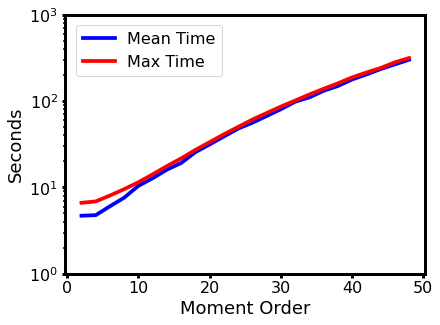

In [24]:
# Set plotting attributes
multiplier = 1
SMALL_SIZE = 16*multiplier
MEDIUM_SIZE = 18*multiplier
BIGGER_SIZE = 20*multiplier
lw = 3*multiplier
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, linewidth=lw)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick.major', width=lw)
plt.rc('xtick.minor', width=0.5*lw)
plt.rc('ytick.major', width=lw)
plt.rc('ytick.minor', width=0.5*lw)
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('lines', linewidth=lw*1.25)
plt.rc('figure', autolayout=True)
plt.rc('legend', fontsize=SMALL_SIZE)
fig1, ax = plt.subplots(figsize=(6.4*multiplier,4.8*multiplier))

ax.plot(order_means.index, order_means[['inst_time', 'param_time', 'integrate_time']].sum(axis=1), color='blue', label='Mean Time')
ax.plot(order_maxs.index, order_maxs[['inst_time', 'param_time', 'integrate_time']].sum(axis=1), color='red', label='Max Time')
ax.set_yscale('log')
max_time = np.ceil(np.log10(np.max([np.max(order_means[['inst_time', 'param_time', 'integrate_time']].sum(axis=1)), 
                                       np.max( order_maxs[['inst_time', 'param_time', 'integrate_time']].sum(axis=1))]))+.1)
min_time = np.floor(np.log10(np.min([np.min(order_means[['inst_time', 'param_time', 'integrate_time']].sum(axis=1)), 
                                         np.min( order_maxs[['inst_time', 'param_time', 'integrate_time']].sum(axis=1))]))-.1)
ax.set_ylim(np.power(10, min_time), np.power(10, max_time))
ax.set_ylabel('Seconds')
ax.set_xlabel('Moment Order')
fig1.legend(loc='upper left', bbox_to_anchor=(.17, .92))
fig1.savefig('timeEfficiency.pdf', format='pdf', bbox_inches='tight')

Figure 3a: plot error vs order.

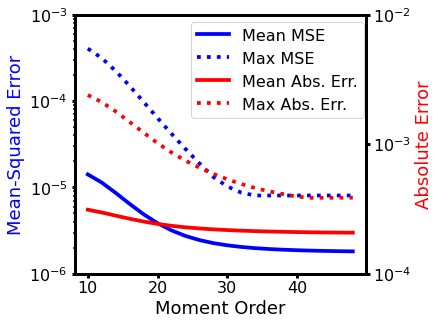

In [25]:
# Set plotting attributes
multiplier = 1
SMALL_SIZE = 16*multiplier
MEDIUM_SIZE = 18*multiplier
BIGGER_SIZE = 20*multiplier
lw = 3*multiplier
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, linewidth=lw)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick.major', width=lw)
plt.rc('xtick.minor', width=0.5*lw)
plt.rc('ytick.major', width=lw)
plt.rc('ytick.minor', width=0.5*lw)
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('lines', linewidth=lw*1.25)
plt.rc('figure', autolayout=True)
plt.rc('legend', fontsize=SMALL_SIZE)

cutoff = 4

fig1, ax1 = plt.subplots(figsize=(6.4*multiplier,4.8*multiplier))

ax2 = ax1.twinx()

ax1.plot(order_means.index, order_means['order10_mse'], color='blue', label='Mean MSE')
ax1.plot(order_means.index, order_maxs['order10_mse'], color='blue', linestyle='dotted', label='Max MSE')
ax1.set_yscale('log')
max_ord10 = np.ceil(np.log10(np.nanmax([np.nanmax(order_means['order10_mse']), np.nanmax( order_maxs['order10_mse'])]))+.1)
min_ord10 = np.floor(np.log10(np.nanmin([np.nanmin(order_means['order10_mse']), np.nanmin( order_maxs['order10_mse'])]))-.1)
ax1.set_ylim(np.power(10, min_ord10), np.power(10, max_ord10))
ax1.set_ylabel('Mean-Squared Error', color='blue')
ax1.set_xlabel('Moment Order')


ax2.plot(order_means.index, order_means['order10_abs_error'], color='red', label='Mean Abs. Err.')
ax2.plot(order_means.index, order_maxs['order10_abs_error'], color='red', linestyle='dotted', label='Max Abs. Err.')
ax2.set_yscale('log')
max_ord10 = np.ceil(np.log10(np.nanmax([np.nanmax(order_means['order10_abs_error']), np.nanmax( order_maxs['order10_abs_error'])]))+.1)
min_ord10 = np.floor(np.log10(np.nanmin([np.nanmin(order_means['order10_abs_error']), np.nanmin( order_maxs['order10_abs_error'])]))-.1)
ax2.set_ylim(np.power(10, min_ord10), np.power(10, max_ord10))
ax2.set_ylabel('Absolute Error', color='red')


fig1.legend( loc='upper right', bbox_to_anchor=(.83, .93))
fig1.savefig('order10error.pdf', format='pdf', bbox_inches='tight')